# **1. Importações**

## Importação dos Avaliadores

In [1]:
#%pip install autorank

In [2]:
from utils.FileManager import FileManager
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from autorank import autorank, plot_stats, create_report

In [3]:
from avaliacao.AvaliadorDriftBase import AvaliadorBatch
from avaliacao.AvaliadorDriftBase import AvaliadorPassivo
from experimento.ExperimentoDrift import Experimento

## Frameworks

In [4]:
# importando o framework
from frameLiedson.FrameLiedson import FrameLiedson
from frameGabriel.SmartWindow import SmartWindow

## Importação dos Detectores

In [5]:
# Importando detectores de drift
from detectores.ADWINDetector import ADWINDetector
from detectores.DDMDetector import DDMDetector
from detectores.EDDMDetector import EDDMDetector
from detectores.FHDDMDetector import FHDDMDetector
from detectores.HDDM_ADetector import HDDM_ADetector
from detectores.PageHinkleyDetector import PageHinkleyDetector
from detectores.HDDM_WDetector import HDDM_WDetector
from detectores.KSWINDetector import KSWINDetector

## Importação dos Regressores Off-line

In [6]:
# Importando modelos offline
from regressores.modelosOffline.LinearRegressionModelo import LinearRegressionModelo
from regressores.modelosOffline.KneighborsRegressorModelo import KneighborsRegressorModelo
from regressores.modelosOffline.LassoRegressionModelo import LassoRegressionModelo
from regressores.modelosOffline.RidgeRegressionModelo import RidgeRegressionModelo
from regressores.modelosOffline.SVRModelo import SVRModelo
from regressores.modelosOffline.RandomForestModelo import RandomForestModelo
from regressores.modelosOffline.MLPRegressorModelo import MLPRegressorModelo

## Importação dos Regressores On-line

In [7]:
# Importando modelos online
from regressores.modelosOnline.BayesianLinearRegressionModelo import BayesianLinearRegressionModelo
from regressores.modelosOnline.HoeffdingTreeRegressorModelo import HoeffdingTreeRegressorModelo
from regressores.modelosOnline.KNNRegressorOnlineModelo import KNNRegressorOnlineModelo
from regressores.modelosOnline.LinearRegressionOnlineModelo import LinearRegressionOnlineModelo
from regressores.modelosOnline.OSELM import OSELMModelo

# **2. Definindo os Dados e Parâmetros**

## Dados

In [8]:
# Lista de séries temporais
series = [
    "AAPL",
    "B3SA3.SA",
    "IXIC",
    "DJI",
    "GSPC",
    "BVSP",
    "USDBRLX"
]

## Parâmetros

In [9]:
# Parâmetros do experimento
tamanho_batch = 300
lags = 10
repeticoes = 5  # Número de execuções para cada modelo-série

# **3. Definindo os Modelos e Avaliadores**

modelos = [
    {
        "nome": "LR + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": HDDM_ADetector
    },
    #{
    #    "nome": "KNN + HDDMA",
    #    "avaliador": AvaliadorBatch(),
    #    "modelo": KNNRegressorOnlineModelo,
    #    "detector": HDDM_ADetector
    #},   
    {
        "nome": "MLP + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": MLPRegressorModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "Lasso + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": HDDM_ADetector
    },    
    {
        "nome": "RF + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "Ridge + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": HDDM_ADetector
    },
    {
        "nome": "SVR + HDDMA",
        "avaliador": AvaliadorBatch(),
        "modelo": SVRModelo,
        "detector": HDDM_ADetector
    },   


    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

modelos = [
    {
        "nome": "Ridge + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    
    {
        "nome": "Lasso + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": KSWINDetector
    },

    {
        "nome": "LR + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    
    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

modelos = [
    {
        "nome": "LR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "KNN + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": KneighborsRegressorModelo,
        "detector": KSWINDetector
    },   
    {
        "nome": "MLP + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": MLPRegressorModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "Lasso + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LassoRegressionModelo,
        "detector": KSWINDetector
    },    
    {
        "nome": "RF + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RandomForestModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "Ridge + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "SVR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": SVRModelo,
        "detector": KSWINDetector
    },   


    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

modelos = [
    {
        "nome": "Ridge + KSWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": KSWINDetector
    },
    
    {
        "nome": "Ridge + ADWINDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": ADWINDetector
    },
    
    {
        "nome": "Ridge + DDMDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": DDMDetector
    },
     
    {
        "nome": "Ridge + EDDMDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": EDDMDetector
    },
     
     
     {
        "nome": "Ridge + FHDDMDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": FHDDMDetector
    },
     
    {
        "nome": "Ridge + HDDM_ADetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": HDDM_ADetector
    },
    
    {
        "nome": "Ridge + PageHinkleyDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": PageHinkleyDetector
    },
    
    {
        "nome": "Ridge + HDDM_WDetector",
        "avaliador": AvaliadorBatch(),
        "modelo": RidgeRegressionModelo,
        "detector": HDDM_WDetector
    },

    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },    
]

In [10]:
modelos = [
    
    
    {
        "nome": "Liedson",
        "avaliador": FrameLiedson(BayesianLinearRegressionModelo, KSWINDetector, 10, tamanho_batch),
        "modelo": BayesianLinearRegressionModelo,
        "detector": KSWINDetector
    },   
    
    
    {
        "nome": "LR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": LinearRegressionModelo,
        "detector": KSWINDetector
    },
    {
        "nome": "SVR + KSWIN",
        "avaliador": AvaliadorBatch(),
        "modelo": SVRModelo,
        "detector": KSWINDetector
    },   


    {
        "nome": "BayesianLinear",
        "avaliador": AvaliadorPassivo(),
        "modelo": BayesianLinearRegressionModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "HoeffdingTree",
        "avaliador": AvaliadorPassivo(),
        "modelo": HoeffdingTreeRegressorModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "KNNRegressorOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": KNNRegressorOnlineModelo,
        "detector": None  # Passivo, não usa detector
    },
    {
        "nome": "LinearRegressionOnline",
        "avaliador": AvaliadorPassivo(),
        "modelo": LinearRegressionOnlineModelo,
        "detector": None  # Passivo, não usa detector
    }, 
    {
        "nome": "OS-ELM",
        "avaliador": AvaliadorPassivo(),
        "modelo": OSELMModelo,
        "detector": None  # Passivo, não usa detector
    },  
]

# **4. Executando o Experimento**

In [11]:
# Criando e executando o experimento
experimento = Experimento(
    series=series,
    modelos=modelos,
    tamanho_batch=tamanho_batch,
    lags=lags,
    repeticoes=repeticoes
)

resultados = experimento.executar()

Executando Liedson na série: AAPL
Executando LR + KSWIN na série: AAPL
Executando SVR + KSWIN na série: AAPL
Executando BayesianLinear na série: AAPL
Executando HoeffdingTree na série: AAPL
Executando KNNRegressorOnline na série: AAPL
Executando LinearRegressionOnline na série: AAPL
Executando OS-ELM na série: AAPL
Executando Liedson na série: B3SA3.SA
Executando LR + KSWIN na série: B3SA3.SA
Executando SVR + KSWIN na série: B3SA3.SA
Executando BayesianLinear na série: B3SA3.SA
Executando HoeffdingTree na série: B3SA3.SA
Executando KNNRegressorOnline na série: B3SA3.SA
Executando LinearRegressionOnline na série: B3SA3.SA
Executando OS-ELM na série: B3SA3.SA
Executando Liedson na série: IXIC
Executando LR + KSWIN na série: IXIC
Executando SVR + KSWIN na série: IXIC
Executando BayesianLinear na série: IXIC
Executando HoeffdingTree na série: IXIC
Executando KNNRegressorOnline na série: IXIC
Executando LinearRegressionOnline na série: IXIC
Executando OS-ELM na série: IXIC
Executando Liedso

In [12]:
# salvando os resultados
arquivo_salvamento = "Experimento_frameworks.csv"
FileManager.salvar_resultados(resultados, arquivo_salvamento)


Resultados salvos em: Experimento_frameworks.csv


'Experimento_frameworks.csv'

# **5. Análise Estatística dos Resultados**

## Leitura dos Resultados

In [13]:
# 1. Ler o arquivo CSV
df = pd.read_csv(arquivo_salvamento)

## Tabelas de Resultados

In [14]:
# 3. Agrupar por modelo e calcular estatísticas
summary = df.groupby(['serie', 'modelo']).agg(
    mae_mean=('mae', 'mean'),
    mae_std=('mae', 'std'),
    qtd_deteccoes_mean=('qtd_deteccoes', 'mean'),
    qtd_deteccoes_std=('qtd_deteccoes', 'std')
).reset_index()

### Média do MAE

In [15]:
# Tabela para a média do MAE
mae_mean_table = summary.pivot(index='serie', columns='modelo', values='mae_mean')
mae_mean_table

modelo,BayesianLinear,HoeffdingTree,KNNRegressorOnline,LR + KSWIN,Liedson,LinearRegressionOnline,OS-ELM,SVR + KSWIN
serie,,,,,,,,
AAPL,0.007968,0.083247,0.011255,0.007132,0.007749,1.202358e+10,0.013275,0.019397
B3SA3.SA,0.029469,0.038586,0.050405,0.037226,0.029311,3.858648e-02,0.038835,0.048646
BVSP,0.017539,0.024016,0.024082,0.016410,0.017170,2.259444e-02,0.021911,0.031193
DJI,0.013574,0.017122,0.018258,0.013367,0.013108,1.685547e-02,0.031968,0.035531
GSPC,0.005660,0.120804,0.007561,0.005791,0.005481,1.788413e+10,0.014588,0.017746
IXIC,0.008735,0.051417,0.011928,0.008444,0.008462,9.147726e+09,0.011232,0.026489
USDBRLX,0.019844,0.026357,0.028399,0.020563,0.019690,2.635711e-02,0.024778,0.030971


### Desvio do MAE

In [16]:
# Tabela para o desvio padrão do MAE
mae_std_table = summary.pivot(index='serie', columns='modelo', values='mae_std')
mae_std_table

modelo,BayesianLinear,HoeffdingTree,KNNRegressorOnline,LR + KSWIN,Liedson,LinearRegressionOnline,OS-ELM,SVR + KSWIN
serie,,,,,,,,
AAPL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B3SA3.SA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BVSP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DJI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GSPC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IXIC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USDBRLX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Média Detecções

In [17]:
# Tabela para a média das detecções
deteccoes_mean_table = summary.pivot(index='serie', columns='modelo', values='qtd_deteccoes_mean')
deteccoes_mean_table

modelo,BayesianLinear,HoeffdingTree,KNNRegressorOnline,LR + KSWIN,Liedson,LinearRegressionOnline,OS-ELM,SVR + KSWIN
serie,,,,,,,,
AAPL,NaN,NaN,NaN,21.0,25.0,NaN,NaN,27.0
B3SA3.SA,NaN,NaN,NaN,8.0,7.0,NaN,NaN,7.0
BVSP,NaN,NaN,NaN,12.0,13.0,NaN,NaN,15.0
DJI,NaN,NaN,NaN,14.0,17.0,NaN,NaN,19.0
GSPC,NaN,NaN,NaN,37.0,51.0,NaN,NaN,57.0
IXIC,NaN,NaN,NaN,20.0,27.0,NaN,NaN,32.0
USDBRLX,NaN,NaN,NaN,9.0,9.0,NaN,NaN,10.0


## Teste Estatístico

In [18]:
# 4. Preparar dados para autorank (uma linha por repetição, colunas por modelo)
df_mae = df.pivot_table(index=["serie", "repeticao"], columns="modelo", values="mae")
# Remover qualquer valor NaN para análise (caso haja)
df_mae = df_mae.dropna()
# Tabela de desempenho
df_mae

modelo              BayesianLinear  HoeffdingTree  KNNRegressorOnline  \
serie    repeticao                                                      
AAPL     1                0.007968       0.083247            0.011255   
         2                0.007968       0.083247            0.011255   
         3                0.007968       0.083247            0.011255   
         4                0.007968       0.083247            0.011255   
         5                0.007968       0.083247            0.011255   
B3SA3.SA 1                0.029469       0.038586            0.050405   
         2                0.029469       0.038586            0.050405   
         3                0.029469       0.038586            0.050405   
         4                0.029469       0.038586            0.050405   
         5                0.029469       0.038586            0.050405   
BVSP     1                0.017539       0.024016            0.024082   
         2                0.017539       0.024016            0.024082   
         3                0.017539       0.024016            0.024082   
         4                0.017539       0.024016            0.024082   
         5                0.017539       0.024016            0.024082   
DJI      1                0.013574       0.017122            0.018258   
         2                0.013574       0.017122            0.018258   
         3                0.013574       0.017122            0.018258   
         4                0.013574       0.017122            0.018258   
         5                0.013574       0.017122            0.018258   
GSPC     1                0.005660       0.120804            0.007561   
         2                0.005660       0.120804            0.007561   
         3                0.005660       0.120804            0.007561   
         4                0.005660       0.120804            0.007561   
         5                0.005660       0.120804            0.007561   
IXIC     1                0.008735       0.051417            0.011928   
         2                0.008735       0.051417            0.011928   
         3                0.008735       0.051417            0.011928   
         4                0.008735       0.051417            0.011928   
         5                0.008735       0.051417            0.011928   
USDBRLX  1                0.019844       0.026357            0.028399   
         2                0.019844       0.026357            0.028399   
         3                0.019844       0.026357            0.028399   
         4                0.019844       0.026357            0.028399   
         5                0.019844       0.026357            0.028399   

modelo              LR + KSWIN   Liedson  LinearRegressionOnline    OS-ELM  \
serie    repeticao                                                           
AAPL     1            0.007132  0.007749            1.202358e+10  0.013275   
         2            0.007132  0.007749            1.202358e+10  0.013275   
         3            0.007132  0.007749            1.202358e+10  0.013275   
         4            0.007132  0.007749            1.202358e+10  0.013275   
         5            0.007132  0.007749            1.202358e+10  0.013275   
B3SA3.SA 1            0.037226  0.029311            3.858648e-02  0.038835   
         2            0.037226  0.029311            3.858648e-02  0.038835   
         3            0.037226  0.029311            3.858648e-02  0.038835   
         4            0.037226  0.029311            3.858648e-02  0.038835   
         5            0.037226  0.029311            3.858648e-02  0.038835   
BVSP     1            0.016410  0.017170            2.259444e-02  0.021911   
         2            0.016410  0.017170            2.259444e-02  0.021911   
         3            0.016410  0.017170            2.259444e-02  0.021911   
         4            0.016410  0.017170            2.259444e-02  0.021911   
         5            0.016410  0.017170          

In [19]:
# computing the most appropriate statistical test
results = autorank(-df_mae)
# printing the report
create_report(results)

The statistical analysis was conducted for 8 populations with 35 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations SVR + KSWIN (p=0.000), LinearRegressionOnline (p=0.000), HoeffdingTree (p=0.000), KNNRegressorOnline (p=0.001), OS-ELM (p=0.001), BayesianLinear (p=0.000), LR + KSWIN (p=0.001), and Liedson (p=0.001). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the diff

<Axes: >

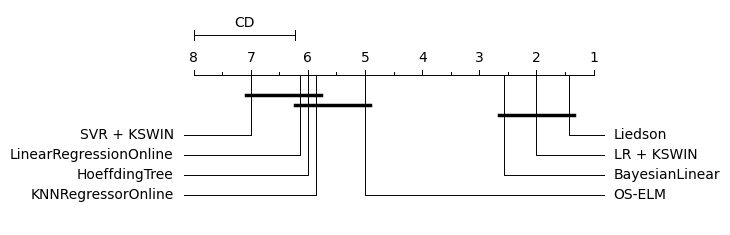

In [20]:
# plotting the results
plot_stats(results, allow_insignificant=True)